<a href="https://colab.research.google.com/github/panyambadri3725/FMML-2021/blob/main/Copy_of_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 24 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=3d99de1e891b12bb5615687741ec29e0527594f6df3129a9ed7f91a5abd66e8b
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
!mkdir known
!wget https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg -O known/elon.jpg
!wget https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg -O known/bill.jpg
!wget https://www.biography.com/.image/t_share/MTE4MDAzNDEwNzg5ODI4MTEw/barack-obama-12782369-1-402.jpg -O known/obama.jpg

--2022-11-28 16:55:39--  https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg
Resolving www.biography.com (www.biography.com)... 151.101.194.98, 151.101.66.98, 151.101.130.98, ...
Connecting to www.biography.com (www.biography.com)|151.101.194.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151791 (148K) [image/jpeg]
Saving to: ‘known/elon.jpg’

known/elon.jpg      100%[===================>] 148.23K  --.-KB/s    in 0.01s   

2022-11-28 16:55:39 (9.78 MB/s) - ‘known/elon.jpg’ saved [151791/151791]

--2022-11-28 16:55:39--  https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 151.101.20.159, 2a04:4e42:5::159
Connecting to pbs.twimg.com (pbs.twimg.com)|151.101.20.159|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-11-28 16:55:39 ERROR 404: Not Found.

--2022-11-28 16:55:39--  https://www.biography.com/.image/t_share/MTE4MDAz

In [3]:
!mkdir unknown
!wget https://i.insider.com/5ddfa893fd9db26b8a4a2df7 -O unknown/1.jpg
!wget https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg -O unknown/2.jpg
!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O unknown/3.jpg
!wget https://specials-images.forbesimg.com/imageserve/1184274010/960x0.jpg -O unknown/4.jpg



--2022-11-28 16:55:45--  https://i.insider.com/5ddfa893fd9db26b8a4a2df7
Resolving i.insider.com (i.insider.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to i.insider.com (i.insider.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2324104 (2.2M) [image/png]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]   2.22M  --.-KB/s    in 0.04s   

2022-11-28 16:55:45 (56.0 MB/s) - ‘unknown/1.jpg’ saved [2324104/2324104]

--2022-11-28 16:55:45--  https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg
Resolving cdn-images-1.medium.com (cdn-images-1.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9804, ...
Connecting to cdn-images-1.medium.com (cdn-images-1.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119795 (117K) [image/jpeg]
Saving to: ‘unknown/2.jpg’

unknown/2.jpg       100%[===================>] 116.99K  --.-KB/s  

In [4]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))


known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
            cv2_imshow(img)
            

    # print(results)


AttributeError: ignored

In [5]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

In [6]:

 
imgElon = face_recognition.load_image_file('/content/badri.jpg')
imgElon = cv2.cvtColor(imgElon,cv2.COLOR_BGR2RGB)
imgTest = face_recognition.load_image_file('/content/teja.jpg')
imgTest = cv2.cvtColor(imgTest,cv2.COLOR_BGR2RGB)

In [7]:
 
faceLoc = face_recognition.face_locations(imgElon)[0]
encodeElon = face_recognition.face_encodings(imgElon)[0]

In [8]:
cv2.rectangle(imgElon,(faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]),(255,0,255),2)

array([[[ 41,  85, 102],
        [ 51,  95, 112],
        [ 54,  97, 114],
        ...,
        [102, 139, 167],
        [107, 144, 172],
        [108, 145, 173]],

       [[ 75, 119, 136],
        [ 81, 125, 142],
        [ 82, 125, 142],
        ...,
        [ 95, 132, 158],
        [114, 151, 177],
        [123, 160, 186]],

       [[113, 156, 175],
        [117, 159, 178],
        [117, 157, 176],
        ...,
        [ 79, 113, 137],
        [107, 141, 165],
        [122, 156, 180]],

       ...,

       [[203, 213, 243],
        [203, 213, 243],
        [202, 212, 242],
        ...,
        [ 75, 113, 113],
        [ 60,  98,  98],
        [ 48,  86,  86]],

       [[203, 213, 243],
        [203, 213, 243],
        [203, 213, 243],
        ...,
        [ 88, 126, 126],
        [ 72, 110, 110],
        [ 59,  97,  97]],

       [[203, 213, 243],
        [203, 213, 243],
        [203, 213, 243],
        ...,
        [100, 138, 138],
        [ 83, 121, 121],
        [ 70, 108, 108]]

[True] [0.]


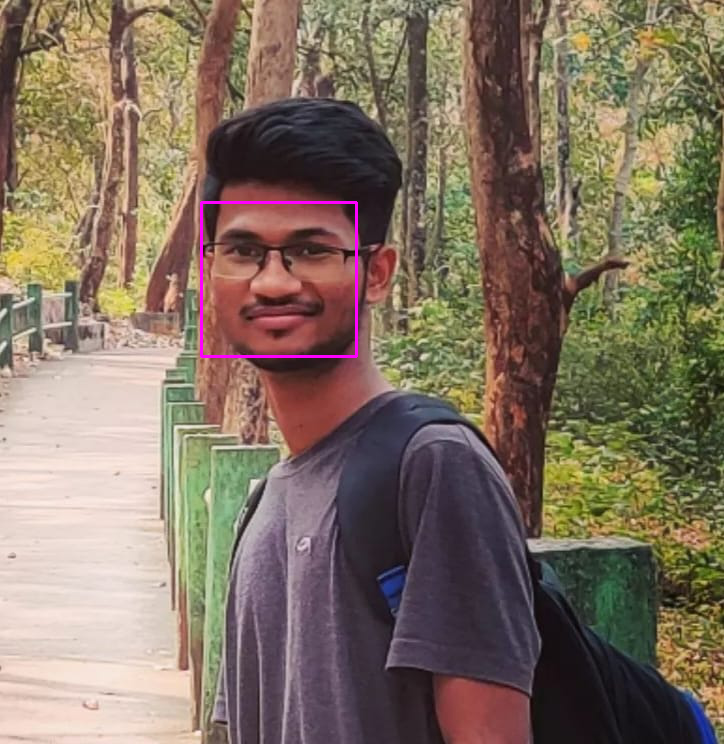

In [13]:

 
imgElon = face_recognition.load_image_file('/content/badri.jpg')
imgElon = cv2.cvtColor(imgElon,cv2.COLOR_BGR2RGB)
imgTest = face_recognition.load_image_file('/content/badri.jpg')
imgTest = cv2.cvtColor(imgTest,cv2.COLOR_BGR2RGB)
 
faceLoc = face_recognition.face_locations(imgElon)[0]
encodeElon = face_recognition.face_encodings(imgElon)[0]
cv2.rectangle(imgElon,(faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]),(255,0,255),2)
 
faceLocTest = face_recognition.face_locations(imgTest)[0]
encodeTest = face_recognition.face_encodings(imgTest)[0]
cv2.rectangle(imgTest,(faceLocTest[3],faceLocTest[0]),(faceLocTest[1],faceLocTest[2]),(255,0,255),2)
 
results = face_recognition.compare_faces([encodeElon],encodeTest)
faceDis = face_recognition.face_distance([encodeElon],encodeTest)
print(results,faceDis)
cv2.putText(imgTest,f'{results} {round(faceDis[0],2)}',(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
cv2_imshow(imgElon)
#cv2_imshow('Elon Musk',imgElon)
#cv2_imshow('Elon Test',imgTest)
#cv2_waitKey(0)

In [14]:
import numpy as np
import face_recognition
import os
from datetime import datetime

In [44]:
 
path = 'Student_images'
images = []
classNames = []
myList = os.listdir(path)
print(myList)

['badri.jpg', 'akhil.jpg', 'teja.jpg', 'dhruv.jpg', 'dhushanth.jpg']


In [45]:
for cl in myList:
  curImg = cv2.imread(f'{path}/{cl}')
  images.append(curImg)
  classNames.append(os.path.splitext(cl)[0])
print(classNames)
 

['badri', 'akhil', 'teja', 'dhruv', 'dhushanth']


In [46]:
def findEncodings(images):
  encodeList = []
  for img in images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    encode = face_recognition.face_encodings(img)[0]
    encodeList.append(encode) 
  return encodeList

In [68]:
def markAttendance(name):
  with open('Attendance.csv','r+') as f:
    myDataList = f.readlines()
    nameList = []
    for line in myDataList:
      entry = line.split(',')
      nameList.append(entry[0])
    if name not in nameList:
      now = datetime.now()
      #dtString = now.strftime('%H:%M:%S')
      f.writelines(f'n{name},{dtString}')

In [47]:
encodeListKnown = findEncodings(images)
print('Encoding Complete')
 
cap = cv2.VideoCapture(0)
#print(encodeListKnown)

Encoding Complete


[(66, 153, 102, 117), (54, 217, 90, 181), (66, 93, 102, 57), (58, 277, 94, 241)] len is 
[0.46822025 0.52393166 0.58852364 0.52897086 0.38807012]
DHUSHANTH
[0.6214885  0.67480246 0.45647134 0.59189984 0.70326708]
TEJA
[0.34486877 0.6340685  0.58597189 0.62232241 0.46503018]
BADRI
[0.55767269 0.39280099 0.64112261 0.58237688 0.50725966]
AKHIL


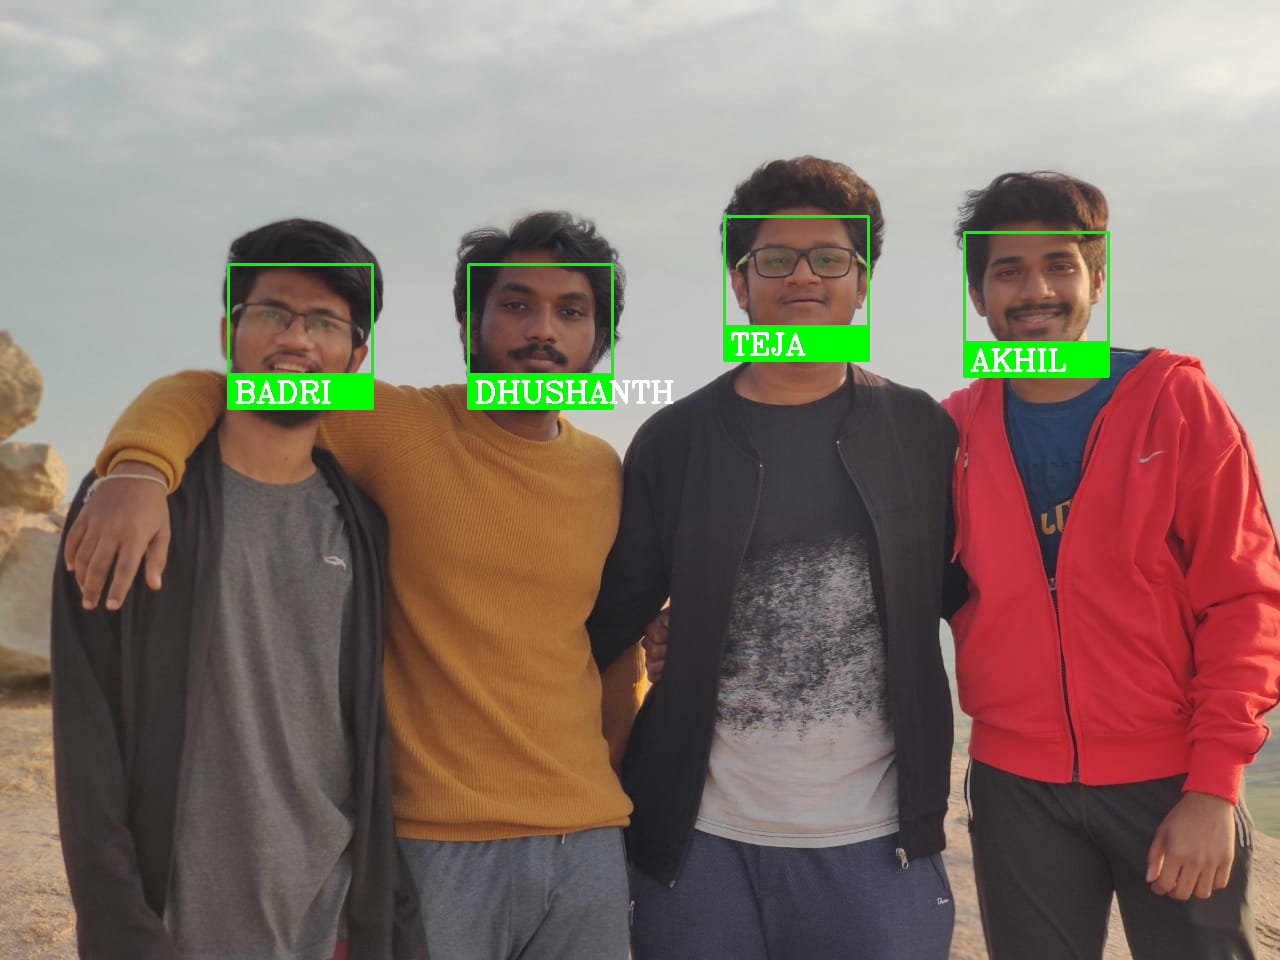

In [65]:
ccc=0
while ccc<1 :
  success, img = cap.read()
  #img = captureScreen()
  #print("img is",type(img),img)
  img = cv2.imread("test9.jpg")
  imgS = cv2.resize(img,(0,0),None,0.25,0.25)
  imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
  
  facesCurFrame = face_recognition.face_locations(imgS)
  print(facesCurFrame,"len is ")
  encodesCurFrame = face_recognition.face_encodings(imgS,facesCurFrame)
  
  for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
    matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
    faceDis = face_recognition.face_distance(encodeListKnown,encodeFace)
    print(faceDis)
    matchIndex = np.argmin(faceDis)
    
    if matches[matchIndex]:
      name = classNames[matchIndex].upper()
      print(name)
      y1,x2,y2,x1 = faceLoc
      y1, x2, y2, x1 = y1*4,x2*4,y2*4,x1*4
      cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
      cv2.rectangle(img,(x1,y2-35),(x2,y2),(0,255,0),cv2.FILLED)
      cv2.putText(img,name,(x1+6,y2-6),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
      #markAttendance(name)
  
  cv2_imshow(img)
  ccc+=1
  #cv2.waitKey(1)

In [72]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
!pip install xlsxwriter
import xlsxwriter as xl
name = "attendance_1a"
outsheet = xl.Workbook(name + ".xlsx")
sheet = outsheet.add_worksheet()
names = {"akhil": [2, "077"], "badri": [3, "120"],"dhruv": [4, "83"],"dhushanth": [5, "101"],"teja": [6, "123"],"Nomitha": [7, "088"]}

sheet.write("A1", "ROLLNUMBER")
sheet.write("B1", "NAME")
sheet.write("C1", "9.40AM to 10.40AM")
for a in names:
    abc=names[a]
    sheet.write("A" + str(abc[0]), abc[1])
    sheet.write("B" + str(abc[0]), a)
    sheet.write("C" + str(abc[0]), "absent")


0

[(66, 153, 102, 117), (54, 217, 90, 181), (66, 93, 102, 57), (58, 277, 94, 241)] len is 
[0.46822025 0.52393166 0.58852364 0.52897086 0.38807012]
dhushanth
out is  [5, '101']
[0.6214885  0.67480246 0.45647134 0.59189984 0.70326708]
teja
out is  [6, '123']
[0.34486877 0.6340685  0.58597189 0.62232241 0.46503018]
badri
out is  [3, '120']
[0.55767269 0.39280099 0.64112261 0.58237688 0.50725966]
akhil
out is  [2, '077']


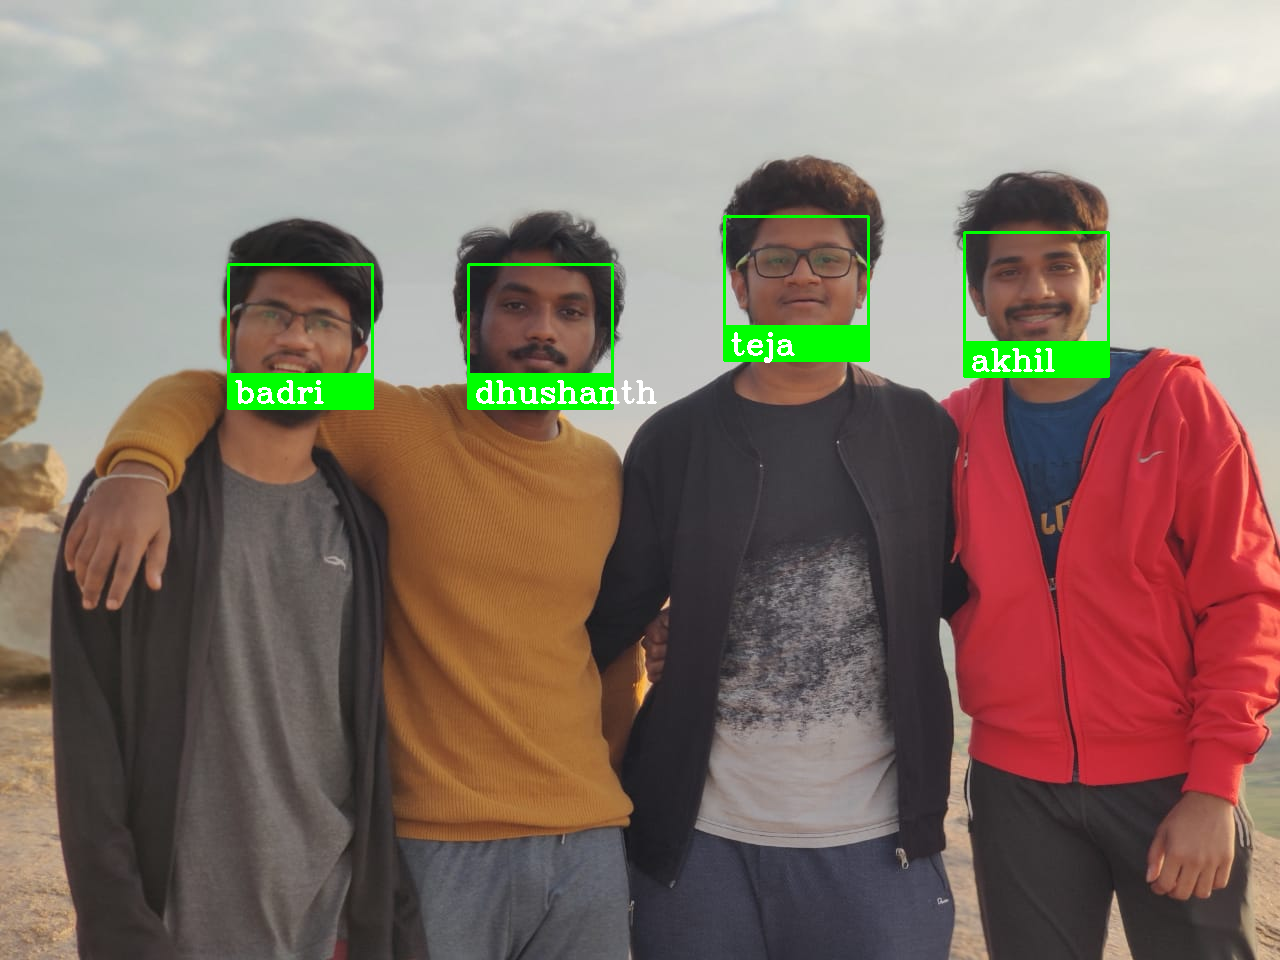

In [89]:
ccc=0
while ccc<1 :
  success, img = cap.read()
  #img = captureScreen()
  #print("img is",type(img),img)
  img = cv2.imread("test9.jpg")
  imgS = cv2.resize(img,(0,0),None,0.25,0.25)
  imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
  
  facesCurFrame = face_recognition.face_locations(imgS)
  print(facesCurFrame,"len is ")
  encodesCurFrame = face_recognition.face_encodings(imgS,facesCurFrame)
  
  for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
    matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
    faceDis = face_recognition.face_distance(encodeListKnown,encodeFace)
    print(faceDis)
    matchIndex = np.argmin(faceDis)
    
    if matches[matchIndex]:
      name = classNames[matchIndex]
      print(name)
      y1,x2,y2,x1 = faceLoc
      y1, x2, y2, x1 = y1*4,x2*4,y2*4,x1*4
      cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
      cv2.rectangle(img,(x1,y2-35),(x2,y2),(0,255,0),cv2.FILLED)
      cv2.putText(img,name,(x1+6,y2-6),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
      out=names[name]
     # print("out is ",out)
      abc=out[0]
      sheet.write("C"+str(abc),"present")
      #markAttendance(name)
  
  cv2_imshow(img)
  ccc+=1
  #cv2.waitKey(1)
outsheet.close()

In [90]:
outsheet.close()